# Team SML

In [371]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.metrics import *
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


In [343]:
df = pd.read_csv('./data/price-monitoring-calculated.csv', index_col=0)

df = df[['rent', 'price_per_sqm', 'area', 'year_built', 'ren_potential', 'smallestdistancetonextoev', 'distancetomainstation', 'floor', 'altitude']]
print(df.corr())
df = df.dropna()
df_train, df_test = train_test_split(df)

                               rent  price_per_sqm      area  year_built  \
rent                       1.000000       0.064694  0.693244    0.264439   
price_per_sqm              0.064694       1.000000 -0.558211   -0.072759   
area                       0.693244      -0.558211  1.000000    0.264359   
year_built                 0.264439      -0.072759  0.264359    1.000000   
ren_potential             -0.043476       0.018791 -0.066776    0.146719   
smallestdistancetonextoev  0.165734      -0.098685  0.199300    0.168466   
distancetomainstation      0.041076      -0.106967  0.071970    0.368617   
altitude                   0.087101      -0.028329  0.107120    0.026153   

                           ren_potential  smallestdistancetonextoev  \
rent                           -0.043476                   0.165734   
price_per_sqm                   0.018791                  -0.098685   
area                           -0.066776                   0.199300   
year_built                     

## Welche Faktoren haben einen Einfluss auf die Miete?

### Wohnfläche
Wie der folgende Plot zeigt, gibt es einen deutlichen linearen Zusammenhang zwischen rent und area.

<AxesSubplot:xlabel='area', ylabel='rent'>

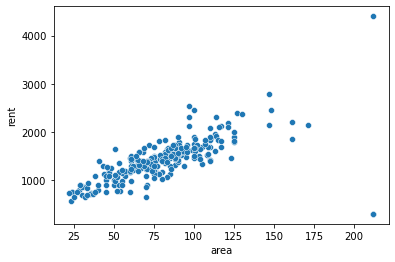

In [282]:
sns.scatterplot(data=df, x="area", y = "rent")

### Baujahr
Es gibt eine Korrelation zwischen year_built und rent, diese ist allerdings nicht wirklich linear.

<AxesSubplot:xlabel='year_built', ylabel='rent'>

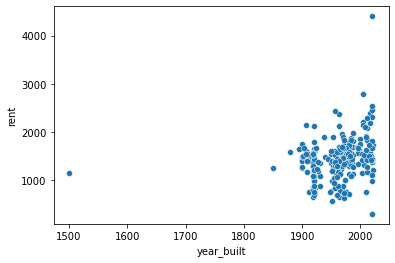

In [284]:
sns.scatterplot(data=df, x="year_built", y = "rent")

### Renovierung
Dieses Attribut sagt aus, ob eine Liegenschaft seit der Erstellung renoviert wurde.

<AxesSubplot:xlabel='ren_potential', ylabel='rent'>

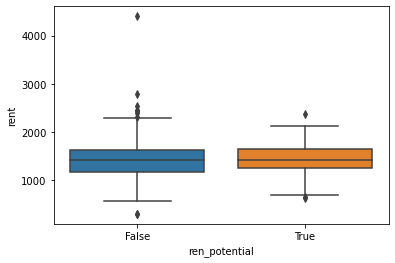

In [287]:
sns.boxplot(x="ren_potential", y="rent", data=df)

### Lärmbeleastung
Diese Attribute geben die Lärmbelasting in Dezibel währen des Tages und der Nacht an. Die Lärmbelastung korreliert nicht mit der rent.

<AxesSubplot:xlabel='LR_DAY', ylabel='rent'>

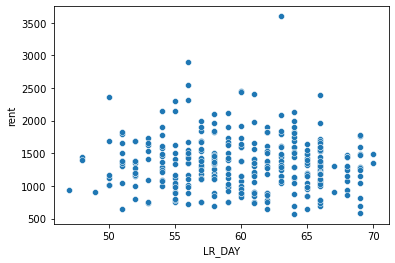

In [212]:
sns.scatterplot(data=df, x="LR_DAY", y = "rent")

<AxesSubplot:xlabel='LR_NIGHT', ylabel='rent'>

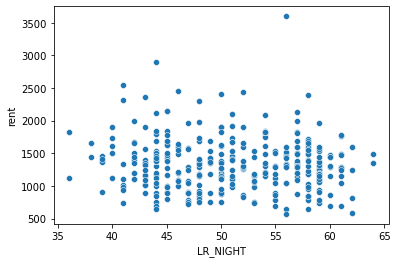

In [213]:
sns.scatterplot(data=df, x="LR_NIGHT", y = "rent")

### Quartier
Der Median ist bei allen Quartieren ähnlich.

[Text(0, 0, 'St.Georgen'),
 Text(1, 0, 'Langgass-Heiligkreuz'),
 Text(2, 0, 'St.Fiden'),
 Text(3, 0, 'Lachen'),
 Text(4, 0, 'Innenstadt'),
 Text(5, 0, 'Riethüsli'),
 Text(6, 0, 'Bruggen'),
 Text(7, 0, 'Linsenbühl-Dreilinden'),
 Text(8, 0, 'Rotmonten'),
 Text(9, 0, 'St.Jakob'),
 Text(10, 0, 'Neudorf'),
 Text(11, 0, 'Notkersegg'),
 Text(12, 0, 'Rosenberg'),
 Text(13, 0, 'Winkeln')]

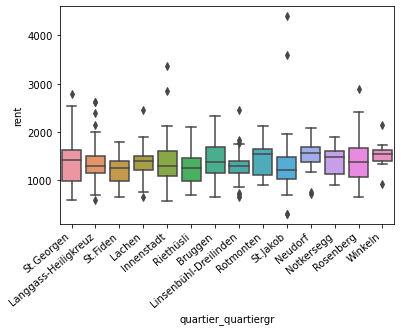

In [209]:
plt = sns.boxplot(x="quartier_quartiergr", y="rent", data=df)
plt.set_xticklabels(plt.get_xticklabels(), rotation=40, ha="right")

### Stockwerk

<AxesSubplot:xlabel='floor', ylabel='rent'>

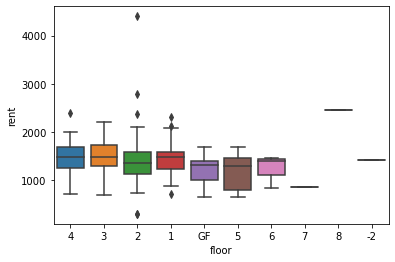

In [328]:
sns.boxplot(data=df, x="floor", y = "rent")

### Anzahl naher Supermärkte

<AxesSubplot:xlabel='supermarketsnearby', ylabel='rent'>

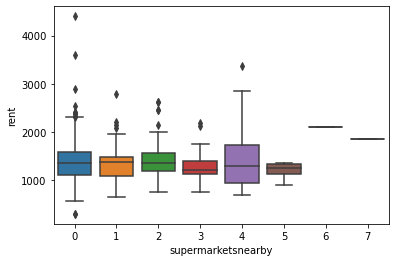

In [217]:
sns.boxplot(data=df, x="supermarketsnearby", y = "rent")

### Anzahl Erholungsorte

<AxesSubplot:xlabel='leisurelocationsnearby', ylabel='rent'>

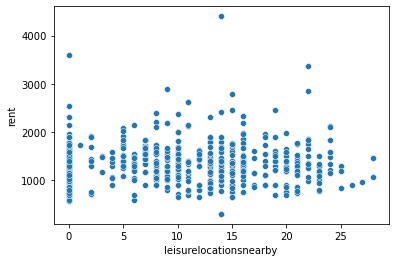

In [218]:
sns.scatterplot(data=df, x="leisurelocationsnearby", y = "rent")

### Anzahl naher Shops

<AxesSubplot:xlabel='othershopsnearby', ylabel='rent'>

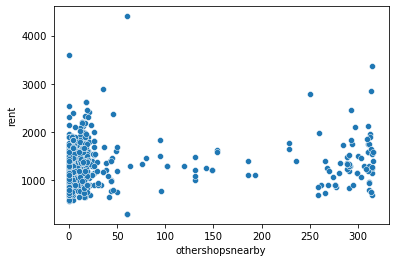

In [221]:
sns.scatterplot(data=df, x="othershopsnearby", y = "rent")

### Distanz zum nächsten Bahnhof

<AxesSubplot:xlabel='smallestdistancetonextoev', ylabel='rent'>

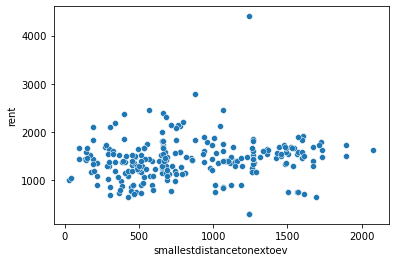

In [316]:
sns.scatterplot(data=df, x="smallestdistancetonextoev", y = "rent")

### Distanz zum Hauptbahnhof

<AxesSubplot:xlabel='distancetomainstation', ylabel='rent'>

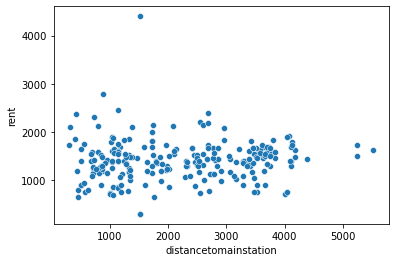

In [379]:
sns.scatterplot(data=df, x="distancetomainstation", y = "rent")

### elevation

<AxesSubplot:xlabel='altitude', ylabel='rent'>

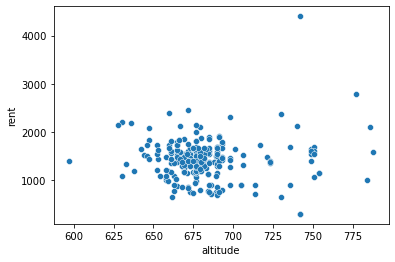

In [378]:
sns.scatterplot(data=df, x="altitude", y = "rent")

## Modelling

Folgende Modelle wurden getestet: Lineare Regression, KNN Regression und Decision Tree Regression.

### Lineare Regression

In [347]:
regr = LinearRegression()
regr.fit(X=df_train[['area', 'year_built']], y=df_train['rent'])
res = regr.score(X=df_test[['area', 'year_built']], y=df_test['rent'])

res = regr.predict(X=df_test[['area', 'year_built']])
print('Mean Error without square ;)', np.sqrt(mean_squared_error(df_test['rent'], res)))

print(regr.predict(X=[[300, 1900]]))


Mean Error without square ;) 333.22915304083347
[2967.13210638]


D:\Entwicklung\miniconda3\envs\hackathon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [346]:
np.mean( (df.rent-np.mean(df.rent))**2 )

175374.00367844666

### KNN Regression

In [366]:
neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X=df_train[['area', 'year_built']], y=df_train['rent'])
neigh.score(X=df_test[['area', 'year_built']], y=df_test['rent'])

res = neigh.predict(X=df_test[['area', 'year_built']])
print('Mean Error without square ;)', np.sqrt(mean_squared_error(df_test['rent'], res)))

Mean Error without square ;) 384.2779718799025


### Decision Tree Regressor

In [377]:
decisionTree = DecisionTreeRegressor(random_state=0)
decisionTree.fit(X=df_train[['area', 'year_built']], y=df_train['rent'])
decisionTree.score(X=df_test[['area', 'year_built']], y=df_test['rent'])

res = decisionTree.predict(X=df_test[['area', 'year_built']])
print('Mean Error without square)', np.sqrt(mean_squared_error(df_test['rent'], res)))

Mean Error without square) 579.8679470927616
